# DataViz Project - Airplane Crashes Since 1908

## 2. Exploratory Data Analysis

### 2.1. The clean dataset

From the previous step, we can now use a clean version of the original dataset.

In [71]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np


file_path = "dataset/dataset_final.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 11 columns):
Date          5265 non-null object
Time          3069 non-null object
Location      5265 non-null object
Latitude      5265 non-null float64
Longitude     5265 non-null float64
Operator      5247 non-null object
Type          5240 non-null object
Aboard        5265 non-null int64
Fatalities    5265 non-null int64
Ground        5265 non-null int64
Summary       5265 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 452.5+ KB


['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


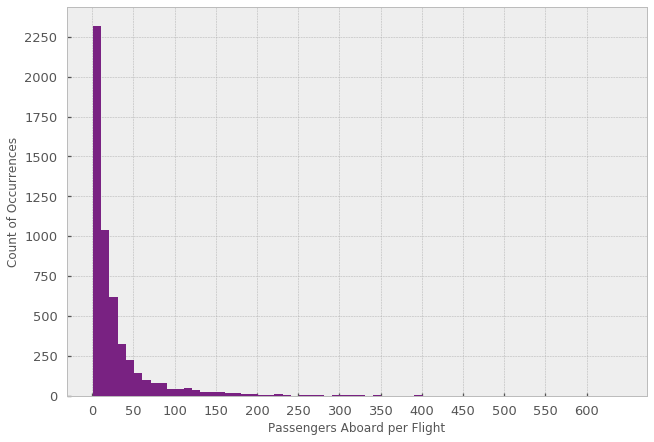

In [67]:
print(plt.style.available)
mp.style.use("bmh")

#colors
# to change default colormap
plt.rcParams["image.cmap"] = "magma"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.magma.colors[90:-16])

df["Aboard"].hist(bins = range(df["Aboard"].min(), df["Aboard"].max(), 10))
plt.ylabel("Count of Occurrences")
plt.xlabel("Passengers Aboard per Flight")
plt.yticks(range(0, 2500, 250))
plt.xticks(range(0, 650, 50))
plt.show()



In [68]:
len(plt.cm.magma.colors[90:-16])

150

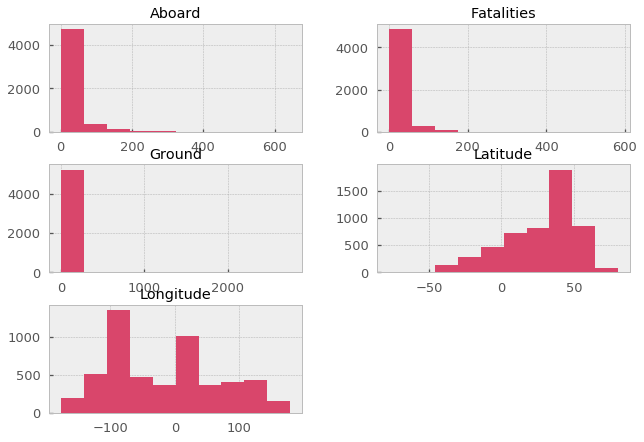

In [69]:
df.hist(color=plt.cm.magma.colors[150:151])
plt.show()

In [72]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")
df["Date"] 

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
5      1915-03-05
6      1915-09-03
7      1916-07-28
8      1916-09-24
9      1916-10-01
10     1916-11-21
11     1916-11-28
12     1917-03-04
13     1917-03-30
14     1917-05-14
15     1917-06-14
16     1917-08-21
17     1917-10-20
18     1918-04-07
19     1918-05-10
20     1918-08-11
21     1918-12-16
22     1919-05-25
23     1919-07-19
24     1919-10-02
25     1919-10-14
26     1919-10-20
27     1919-10-30
28     1920-03-10
29     1920-03-30
          ...    
5235   2008-11-13
5236   2008-11-16
5237   2008-11-27
5238   2008-12-03
5239   2008-12-11
5240   2008-12-15
5241   2009-01-04
5242   2009-01-15
5243   2009-02-07
5244   2009-02-07
5245   2009-02-12
5246   2009-02-15
5247   2009-02-20
5248   2009-02-25
5249   2009-03-09
5250   2009-03-12
5251   2009-03-22
5252   2009-03-23
5253   2009-04-01
5254   2009-04-06
5255   2009-04-09
5256   2009-04-17
5257   2009-04-17
5258   2009-04-29
5259   200

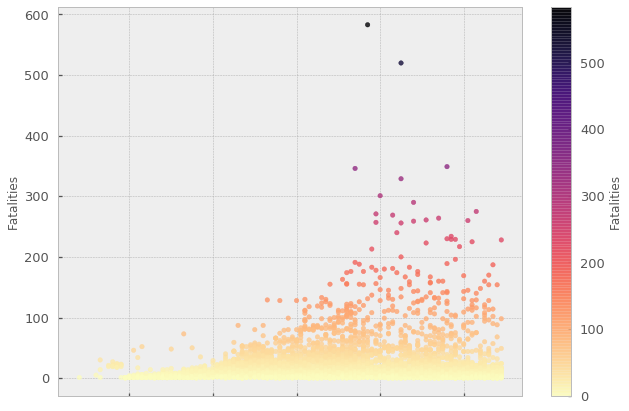

In [48]:
year = df.Date.dt.year
fatalities = df.Fatalities
d={"Year": year, "Fatalities": fatalities}

fatalities_year = pd.DataFrame(data=d)
fatalities_year
fatalities_year.plot.scatter(x="Year",y="Fatalities", c='Fatalities', colormap='magma_r', alpha=0.8)
plt.show()

#TODO: aggregate fatalities and ground for a more figure of deaths by accident